# Dimensionality Reduction

Dimensionality reduction is a crucial step in the preprocessing of data in machine learning and data analysis. It aims to reduce the number of random variables under consideration, obtaining a set of principal variables. This process can help to simplify models, reduce computational cost, and overcome issues related to the curse of dimensionality.

In this notebook, we will introduce three primary techniques for dimensionality reduction:
1. Principal Component Analysis (PCA)
2. Multiple Correspondence Analysis (MCA)
3. Factor Analysis of Mixed Data (FAMD)

These techniques will be covered in more detail in subsequent chapters.

## Principal Component Analysis (PCA)

Principal Component Analysis (PCA) is a statistical procedure that uses orthogonal transformation to convert a set of possibly correlated variables into a set of values of linearly uncorrelated variables called principal components. The number of principal components is less than or equal to the number of original variables. 

PCA is widely used in exploratory data analysis and for making predictive models. Its main goal is to capture the maximum variance with fewer components.


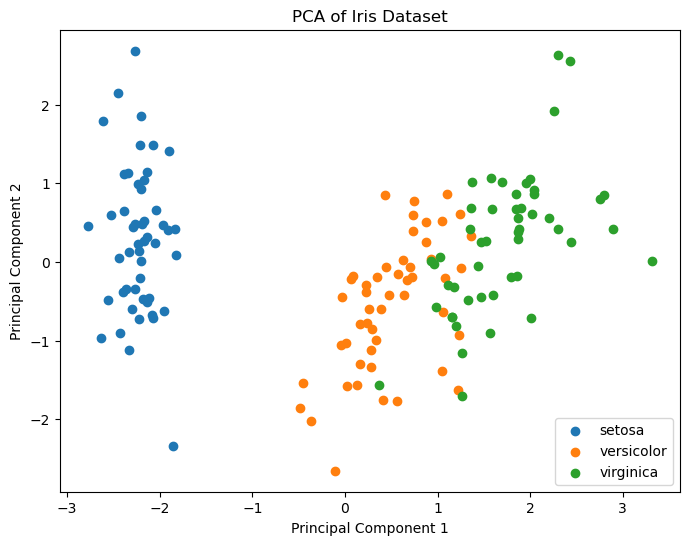

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.datasets import load_iris

# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Standardize the data
X_standardized = (X - X.mean(axis=0)) / X.std(axis=0)

# Apply PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_standardized)

# Create a DataFrame with PCA components
df_pca = pd.DataFrame(X_pca, columns=['Principal Component 1', 'Principal Component 2'])
df_pca['Target'] = y

# Plot the PCA results
plt.figure(figsize=(8, 6))
for target in np.unique(y):
    subset = df_pca[df_pca['Target'] == target]
    plt.scatter(subset['Principal Component 1'], subset['Principal Component 2'], label=iris.target_names[target])
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Iris Dataset')
plt.legend()
plt.show()


## Multiple Correspondence Analysis (MCA)

Multiple Correspondence Analysis (MCA) is an extension of Correspondence Analysis (CA) which allows one to analyze the pattern of relationships of several categorical dependent variables. MCA is useful for summarizing and visualizing the relationships between categorical variables in a dataset.


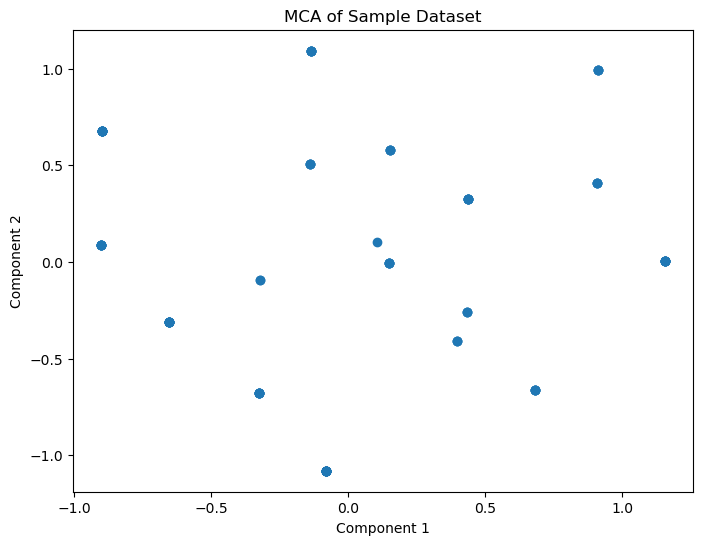

In [4]:
import prince

# Load a sample dataset
data = pd.DataFrame({
    'Feature 1': np.random.choice(['A', 'B', 'C'], size=100),
    'Feature 2': np.random.choice(['X', 'Y', 'Z'], size=100),
    'Feature 3': np.random.choice(['Yes', 'No'], size=100)
})

# Apply MCA
mca = prince.MCA(n_components=2)
mca = mca.fit(data)

# Transform the data
data_mca = mca.transform(data)

# Plot the MCA results
plt.figure(figsize=(8, 6))
plt.scatter(data_mca[0], data_mca[1])
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.title('MCA of Sample Dataset')
plt.show()

## Factor Analysis of Mixed Data (FAMD)

Factor Analysis of Mixed Data (FAMD) is a method used when dealing with datasets containing both categorical and continuous variables. It is a hybrid approach that combines aspects of PCA and MCA, providing a comprehensive tool for dimensionality reduction in mixed datasets.

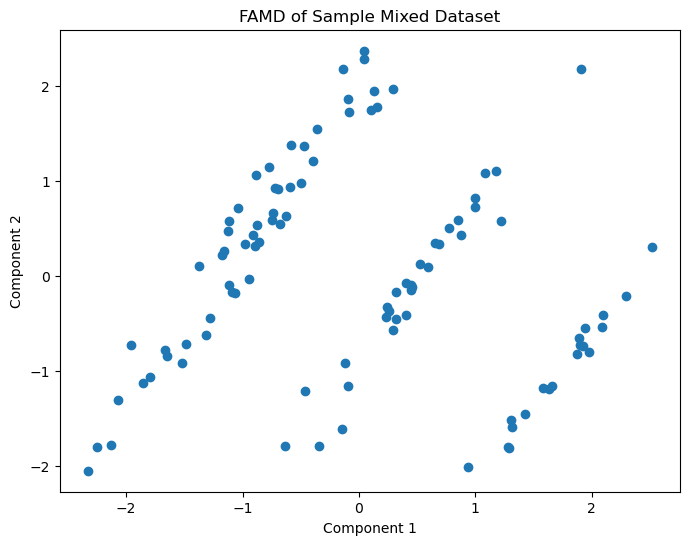

In [5]:
# Generate a sample dataset with mixed data types
data_mixed = pd.DataFrame({
    'Numeric Feature 1': np.random.randn(100),
    'Numeric Feature 2': np.random.randn(100) * 2,
    'Categorical Feature 1': np.random.choice(['Type A', 'Type B', 'Type C'], size=100),
    'Categorical Feature 2': np.random.choice(['Low', 'Medium', 'High'], size=100)
})

# Apply FAMD
famd = prince.FAMD(n_components=2, random_state=42)
famd = famd.fit(data_mixed)

# Transform the data
data_famd = famd.transform(data_mixed)

# Plot the FAMD results
plt.figure(figsize=(8, 6))
plt.scatter(data_famd[0], data_famd[1])
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.title('FAMD of Sample Mixed Dataset')
plt.show()

## Why Use PCA, MCA, FAMD?

### Principal Component Analysis (PCA)
- **When to use PCA**: PCA is suitable when you have a dataset with continuous numerical variables and you want to reduce the number of variables while retaining as much variance as possible.
- **Advantages**: Reduces dimensionality, improves computational efficiency, helps in noise reduction, and simplifies the visualization of high-dimensional data.
- **Limitations**: Not suitable for categorical data, may lose interpretability, and assumes linear relationships.

### Multiple Correspondence Analysis (MCA)
- **When to use MCA**: MCA is appropriate when you are dealing with categorical data and need to understand the relationships between multiple categorical variables.
- **Advantages**: Summarizes and visualizes complex relationships between categorical variables, retains interpretability, and provides insights into patterns and groupings.
- **Limitations**: May not be suitable for continuous data, can become complex with a large number of categories.

### Factor Analysis of Mixed Data (FAMD)
- **When to use FAMD**: FAMD is ideal when your dataset contains both continuous and categorical variables and you need a method that can handle this mixed data type.
- **Advantages**: Combines the strengths of PCA and MCA, handles mixed data types, and provides a comprehensive view of the dataset.
- **Limitations**: Interpretation can be challenging, may require significant preprocessing, and computationally intensive for large datasets.

### Differences between PCA, MCA, and FAMD
- **Type of Data**: PCA is for continuous numerical data, MCA is for categorical data, and FAMD is for mixed data types (both continuous and categorical).
- **Purpose**: PCA captures the maximum variance with fewer components, MCA explores relationships between categorical variables, and FAMD provides a balanced approach for mixed data.
- **Output**: PCA and FAMD produce principal components, while MCA produces dimensions that summarize categorical data relationships.
